In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# Q1

In [16]:
df = pd.read_csv(r'C:\Users\acer\Desktop\excelr\assignments\4 simple linear regression\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.columns,df.dtypes

(Index(['Delivery Time', 'Sorting Time'], dtype='object'),
 Delivery Time    float64
 Sorting Time       int64
 dtype: object)

In [7]:
df.head(),df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


(   Delivery Time  Sorting Time
 0          21.00            10
 1          13.50             4
 2          19.75             6
 3          24.00             9
 4          29.00            10,
 None,
        Delivery Time  Sorting Time
 count      21.000000     21.000000
 mean       16.790952      6.190476
 std         5.074901      2.542028
 min         8.000000      2.000000
 25%        13.500000      4.000000
 50%        17.830000      6.000000
 75%        19.750000      8.000000
 max        29.000000     10.000000)

In [8]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

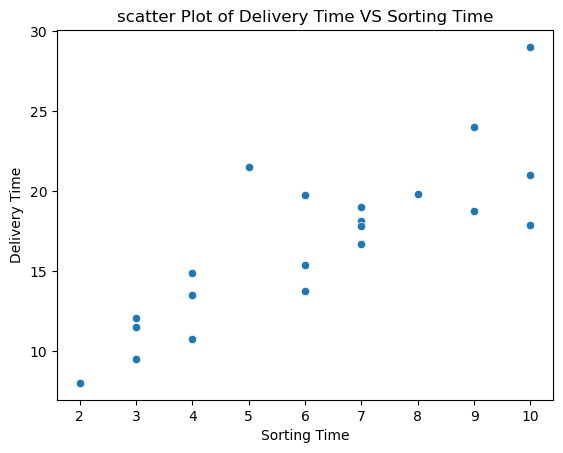

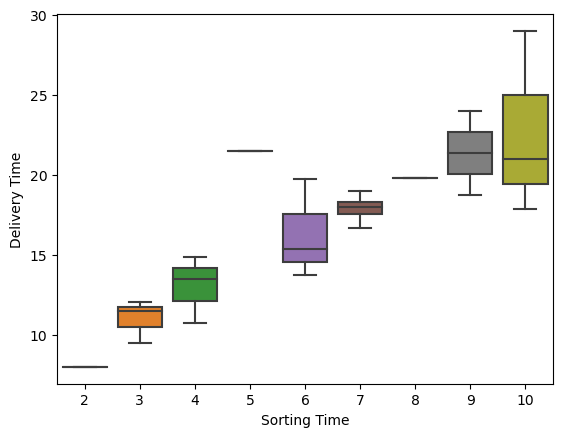

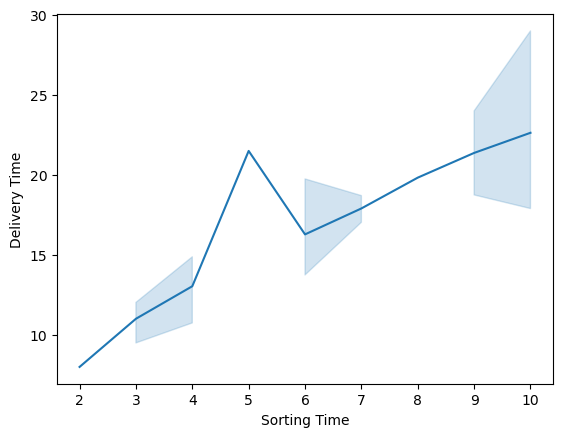

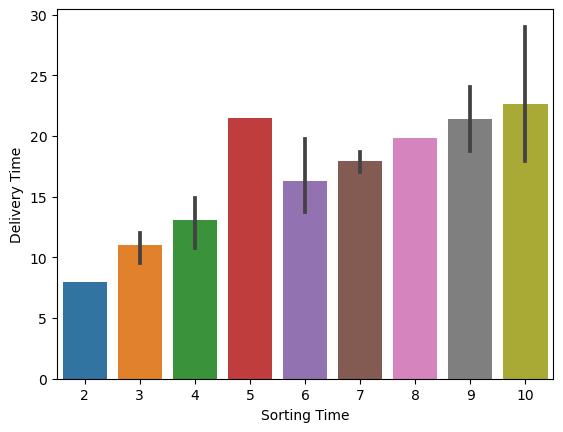

In [15]:
import seaborn as sns
sns.scatterplot(x='Sorting Time',y='Delivery Time',data = df)
plt.title('scatter Plot of Delivery Time VS Sorting Time')
plt.show()

sns.boxplot(x='Sorting Time',y='Delivery Time',data = df)
plt.show()


sns.lineplot(x='Sorting Time',y='Delivery Time',data = df)
plt.show()


sns.barplot(x='Sorting Time',y='Delivery Time',data = df)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data


array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [19]:
import numpy as np
log_trans_data = np.log(df)
log_trans_data

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


In [20]:
original_data = np.array([df])
sqrt_transformed_data = np.sqrt(original_data)

print("Original Data", original_data)
print("Square Root Transformed Data",sqrt_transformed_data)

Original Data [[[21.   10.  ]
  [13.5   4.  ]
  [19.75  6.  ]
  [24.    9.  ]
  [29.   10.  ]
  [15.35  6.  ]
  [19.    7.  ]
  [ 9.5   3.  ]
  [17.9  10.  ]
  [18.75  9.  ]
  [19.83  8.  ]
  [10.75  4.  ]
  [16.68  7.  ]
  [11.5   3.  ]
  [12.03  3.  ]
  [14.88  4.  ]
  [13.75  6.  ]
  [18.11  7.  ]
  [ 8.    2.  ]
  [17.83  7.  ]
  [21.5   5.  ]]]
Square Root Transformed Data [[[4.58257569 3.16227766]
  [3.67423461 2.        ]
  [4.44409721 2.44948974]
  [4.89897949 3.        ]
  [5.38516481 3.16227766]
  [3.9179076  2.44948974]
  [4.35889894 2.64575131]
  [3.082207   1.73205081]
  [4.23083916 3.16227766]
  [4.33012702 3.        ]
  [4.45308882 2.82842712]
  [3.27871926 2.        ]
  [4.08411557 2.64575131]
  [3.39116499 1.73205081]
  [3.46842904 1.73205081]
  [3.8574603  2.        ]
  [3.70809924 2.44948974]
  [4.25558457 2.64575131]
  [2.82842712 1.41421356]
  [4.22255847 2.64575131]
  [4.63680925 2.23606798]]]


In [22]:
original_data = np.array([df])
square_transformed_data = np.square(original_data)

print("Original Data:", original_data)
print("Square Transformed Data", square_transformed_data)

Original Data: [[[21.   10.  ]
  [13.5   4.  ]
  [19.75  6.  ]
  [24.    9.  ]
  [29.   10.  ]
  [15.35  6.  ]
  [19.    7.  ]
  [ 9.5   3.  ]
  [17.9  10.  ]
  [18.75  9.  ]
  [19.83  8.  ]
  [10.75  4.  ]
  [16.68  7.  ]
  [11.5   3.  ]
  [12.03  3.  ]
  [14.88  4.  ]
  [13.75  6.  ]
  [18.11  7.  ]
  [ 8.    2.  ]
  [17.83  7.  ]
  [21.5   5.  ]]]
Square Transformed Data [[[441.     100.    ]
  [182.25    16.    ]
  [390.0625  36.    ]
  [576.      81.    ]
  [841.     100.    ]
  [235.6225  36.    ]
  [361.      49.    ]
  [ 90.25     9.    ]
  [320.41   100.    ]
  [351.5625  81.    ]
  [393.2289  64.    ]
  [115.5625  16.    ]
  [278.2224  49.    ]
  [132.25     9.    ]
  [144.7209   9.    ]
  [221.4144  16.    ]
  [189.0625  36.    ]
  [327.9721  49.    ]
  [ 64.       4.    ]
  [317.9089  49.    ]
  [462.25    25.    ]]]


mean_aquared_error:2.4978458765150036
r2_score:0.8401314793938008
Predicted Delivery Time for Sorting Time [8]: 19.671458189357292


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


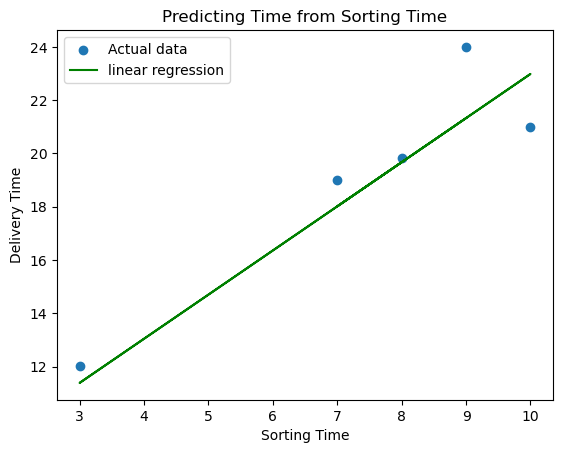

In [24]:
X = df[['Sorting Time']]
y = df['Delivery Time']  

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'mean_aquared_error:{mse}')
print(f'r2_score:{r2}')

plt.scatter(X_test, y_test, label='Actual data')
plt.plot(X_test, y_pred,label = 'linear regression',color = 'g')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Predicting Time from Sorting Time')
plt.legend()

new_sorting_time = [[8]] 
predicted_delivery_time = model.predict(new_sorting_time)
print(f'Predicted Delivery Time for Sorting Time {new_sorting_time[0]}: {predicted_delivery_time[0]}')

# Q2

In [27]:
df1 = pd.read_csv(r'c:\Users\acer\Desktop\excelr\assignments\4 simple linear regression\Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
df1.columns,df1.dtypes

(Index(['YearsExperience', 'Salary'], dtype='object'),
 YearsExperience    float64
 Salary             float64
 dtype: object)

In [30]:
df1.head(),df1.info(),df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


(   YearsExperience   Salary
 0              1.1  39343.0
 1              1.3  46205.0
 2              1.5  37731.0
 3              2.0  43525.0
 4              2.2  39891.0,
 None,
        YearsExperience         Salary
 count        30.000000      30.000000
 mean          5.313333   76003.000000
 std           2.837888   27414.429785
 min           1.100000   37731.000000
 25%           3.200000   56720.750000
 50%           4.700000   65237.000000
 75%           7.700000  100544.750000
 max          10.500000  122391.000000)

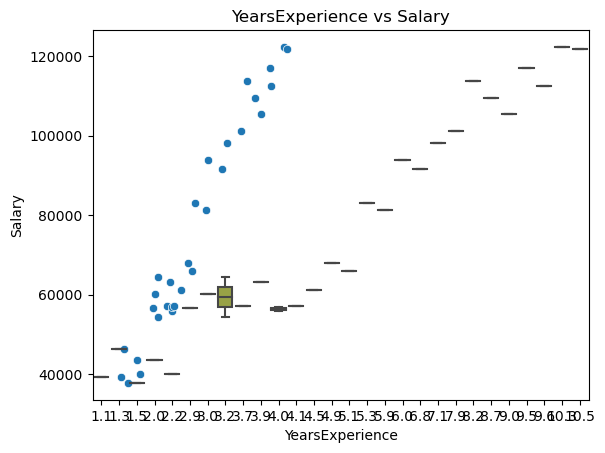

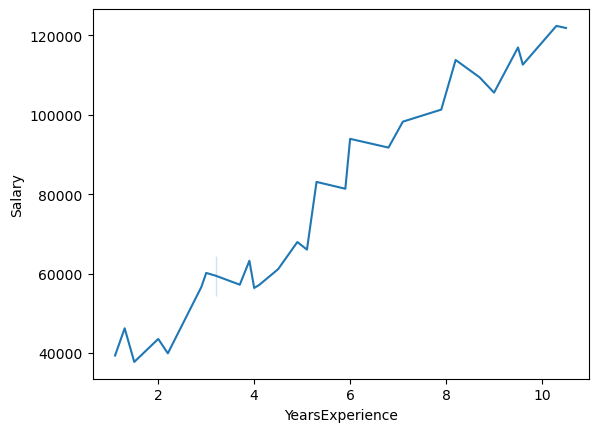

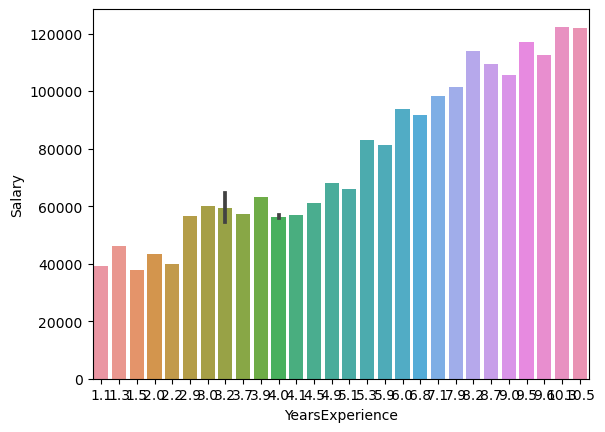

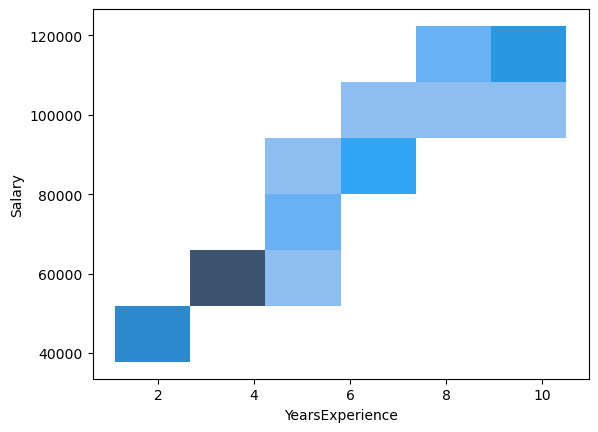

In [32]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df1)
plt.title('YearsExperience vs Salary' )
plt.show

sns.boxplot(x='YearsExperience',y='Salary', data=df1)
plt.show()

sns.lineplot(x='YearsExperience',y='Salary', data = df1)
plt.show()

sns.barplot(x='YearsExperience', y='Salary', data=df1)
plt.show()

sns.histplot(x='YearsExperience', y='Salary', data=df1)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

import numpy as np
log_transf_data = np.log(df1)

In [37]:
square_transformed_data = np.square(df1)
print("Square Transformed Data",square_transformed_data)

sqrt_transformed_data = np.sqrt(df1)
print("Square Root Transformed Data",sqrt_transformed_data)

Square Transformed Data     YearsExperience        Salary
0              1.21  1.547872e+09
1              1.69  2.134902e+09
2              2.25  1.423628e+09
3              4.00  1.894426e+09
4              4.84  1.591292e+09
5              8.41  3.208316e+09
6              9.00  3.618022e+09
7             10.24  2.964258e+09
8             10.24  4.153158e+09
9             13.69  3.270582e+09
10            15.21  3.996516e+09
11            16.00  3.112970e+09
12            16.00  3.244100e+09
13            16.81  3.258241e+09
14            20.25  3.734554e+09
15            24.01  4.615572e+09
16            26.01  4.359829e+09
17            28.09  6.903616e+09
18            34.81  6.619938e+09
19            36.00  8.824724e+09
20            46.24  8.415861e+09
21            50.41  9.657583e+09
22            62.41  1.026210e+10
23            67.24  1.295317e+10
24            75.69  1.197514e+10
25            81.00  1.114756e+10
26            90.25  1.368175e+10
27            92.16  1.2

In [35]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

Mean Squared Error: 39567375.94271316
R-squared: 0.9394460269118792


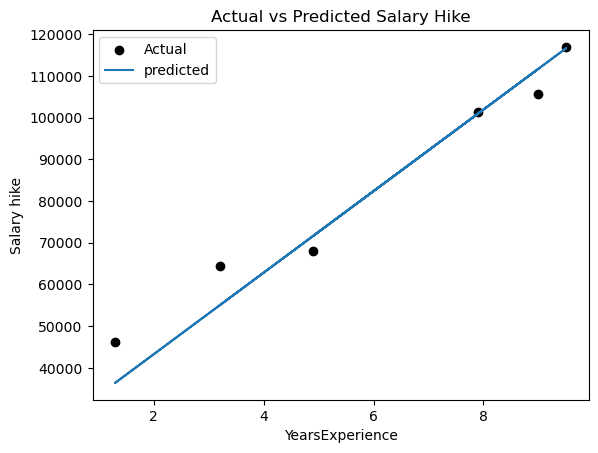

In [39]:
X = df1[['YearsExperience']]
y = df1['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(X_test, y_test,label = 'Actual',color ='black')
plt.plot(X_test,y_pred,label = 'predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary hike')
plt.title('Actual vs Predicted Salary Hike')
plt.legend()